In [1]:
import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray

import matplotlib.pyplot as plt


In [7]:
RAIN_COL = "rain_mm"

EASTING_RANGE = [276000, 320500] ## based on data I have
NORTHING_RANGE = [258000, 301500] ## based on data I have

# Load data

## Load CEH-GEAR

In [3]:
ceh_plynlimon = xr.open_dataset('../../../CEH_GEAR/ceh_1km_plynlimonregion_19760101_20101231.nc')
ceh_plynlimon = ceh_plynlimon.rename({'rainfall_amount': RAIN_COL})

## Load HGHT grid

In [13]:
severn_hght = rioxarray.open_rasterio('../../../Spatial Data/HGHT_SEVERN_1km_CEHGrid.tif')
severn_hght = severn_hght.sortby('y')
severn_hght = severn_hght.sel(band=1)

severn_hght = severn_hght.sel(x=slice(*EASTING_RANGE), y=slice(*NORTHING_RANGE))

# Shift grid

In [14]:
def coerse_data_into_haduk_format(data, offset, xrange, yrange):
    """
    Quick fix for coersing data to have same grid as HADUK.
    """
    data = data.assign_coords(x=(data['x'] + offset))
    data = data.assign_coords(y=(data['y'] + offset))
    data = data.sel(x=xrange, y=yrange)
    return data


In [15]:
ceh_plynlimon_hght = coerse_data_into_haduk_format(ceh_plynlimon, offset=500, xrange=slice(*EASTING_RANGE), yrange=slice(*NORTHING_RANGE))

In [18]:
ceh_plynlimon_hght['hght'] = severn_hght

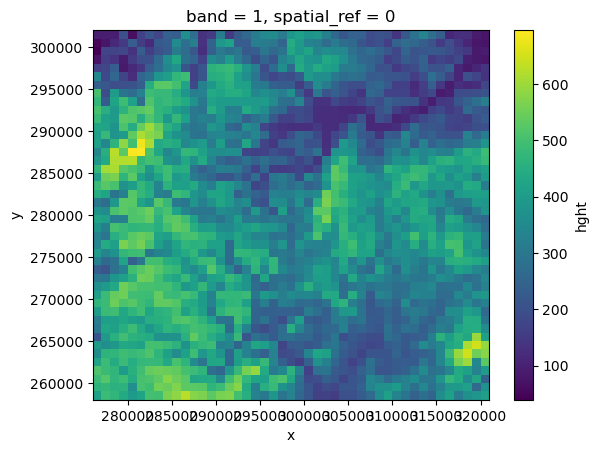

In [23]:
(ceh_plynlimon_hght['hght']/10).plot()